## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Wed Mar 20 05:33:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2012** with version **YOLOv8.0.28**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

### Importing Dataset
We're importing our own annotated dataset from roboflow which you can access from [this URL](https://universe.roboflow.com/lums-eo5z1/islo-data-binary/browse?queryText=filename%3A%22gesh_368553_311262_20%22&pageSize=50&startingIndex=0&browseQuery=true). You would have to change the API key in `rf = Roboflow(api_key="your private API key")` to your own.


In [ ]:
!pip install roboflow --quiet


# !mkdir {HOME}/dataset_2_AUG
# %cd {HOME}/datasets_2_AUG

'''
FOR DATASET-2 AUGMENTED
'''
# from roboflow import Roboflow
# rf = Roboflow(api_key="t8LsaadXEIjlmHXMCc47")
# project = rf.workspace("lums-eo5z1").project("islo-data-binary")
# dataset_2_AUG = project.version(21).download("yolov8")

'''
FOR DATASET-2 NON-AUGMENTED
'''
# from roboflow import Roboflow
# rf = Roboflow(api_key="Enter Your Roboflow API")
# project = rf.workspace("lums-eo5z1").project("islo-data-binary")
# dataset_2_AUG = project.version(12).download("yolov8")

'''
FOR DATASET-1 NON-AUGMENTED
'''
# from roboflow import Roboflow
# rf = Roboflow(api_key="Enter Your Roboflow API")
# project = rf.workspace("lums-eo5z1").project("islo-data-binary_2")
# version = project.version(2)
# dataset = version.download("yolov8")

'''
FOR DATASET-1 AUGMENTED
'''
# from roboflow import Roboflow
# rf = Roboflow(api_key="Enter Your Roboflow API")
# project = rf.workspace("lums-eo5z1").project("islo-data-binary_2")
# version = project.version(1)
# dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.29, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Karachi_2-1 in yolov8:: 100%|██████████| 32/32 [00:00<00:00, 4127.36it/s]


## Custom Training
Trained the Yolov8's extra large on the dataset extracted above

In [ ]:
%cd {HOME}
print(dataset.location)
!yolo task=segment mode=train model=yolov8x-seg.pt data={dataset.location}/data.yaml epochs=135 imgsz=256 lr0=0.001 lrf=0.05 batch=10

/content
/content/datasets/Islo-data-Binary-12
100% 137M/137M [00:00<00:00, 310MB/s]
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/datasets/Islo-data-Binary-12/data.yaml, epochs=135, time=None, patience=50, batch=10, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    labels.jpg		 train_batch1751.jpg
BoxF1_curve.png					    MaskF1_curve.png	 train_batch1752.jpg
BoxP_curve.png					    MaskP_curve.png	 train_batch1.jpg
BoxPR_curve.png					    MaskPR_curve.png	 train_batch2.jpg
BoxR_curve.png					    MaskR_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1703621427.ad1dbd439430.1345.0  train_batch0.jpg	 val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch1750.jpg  weights


/content


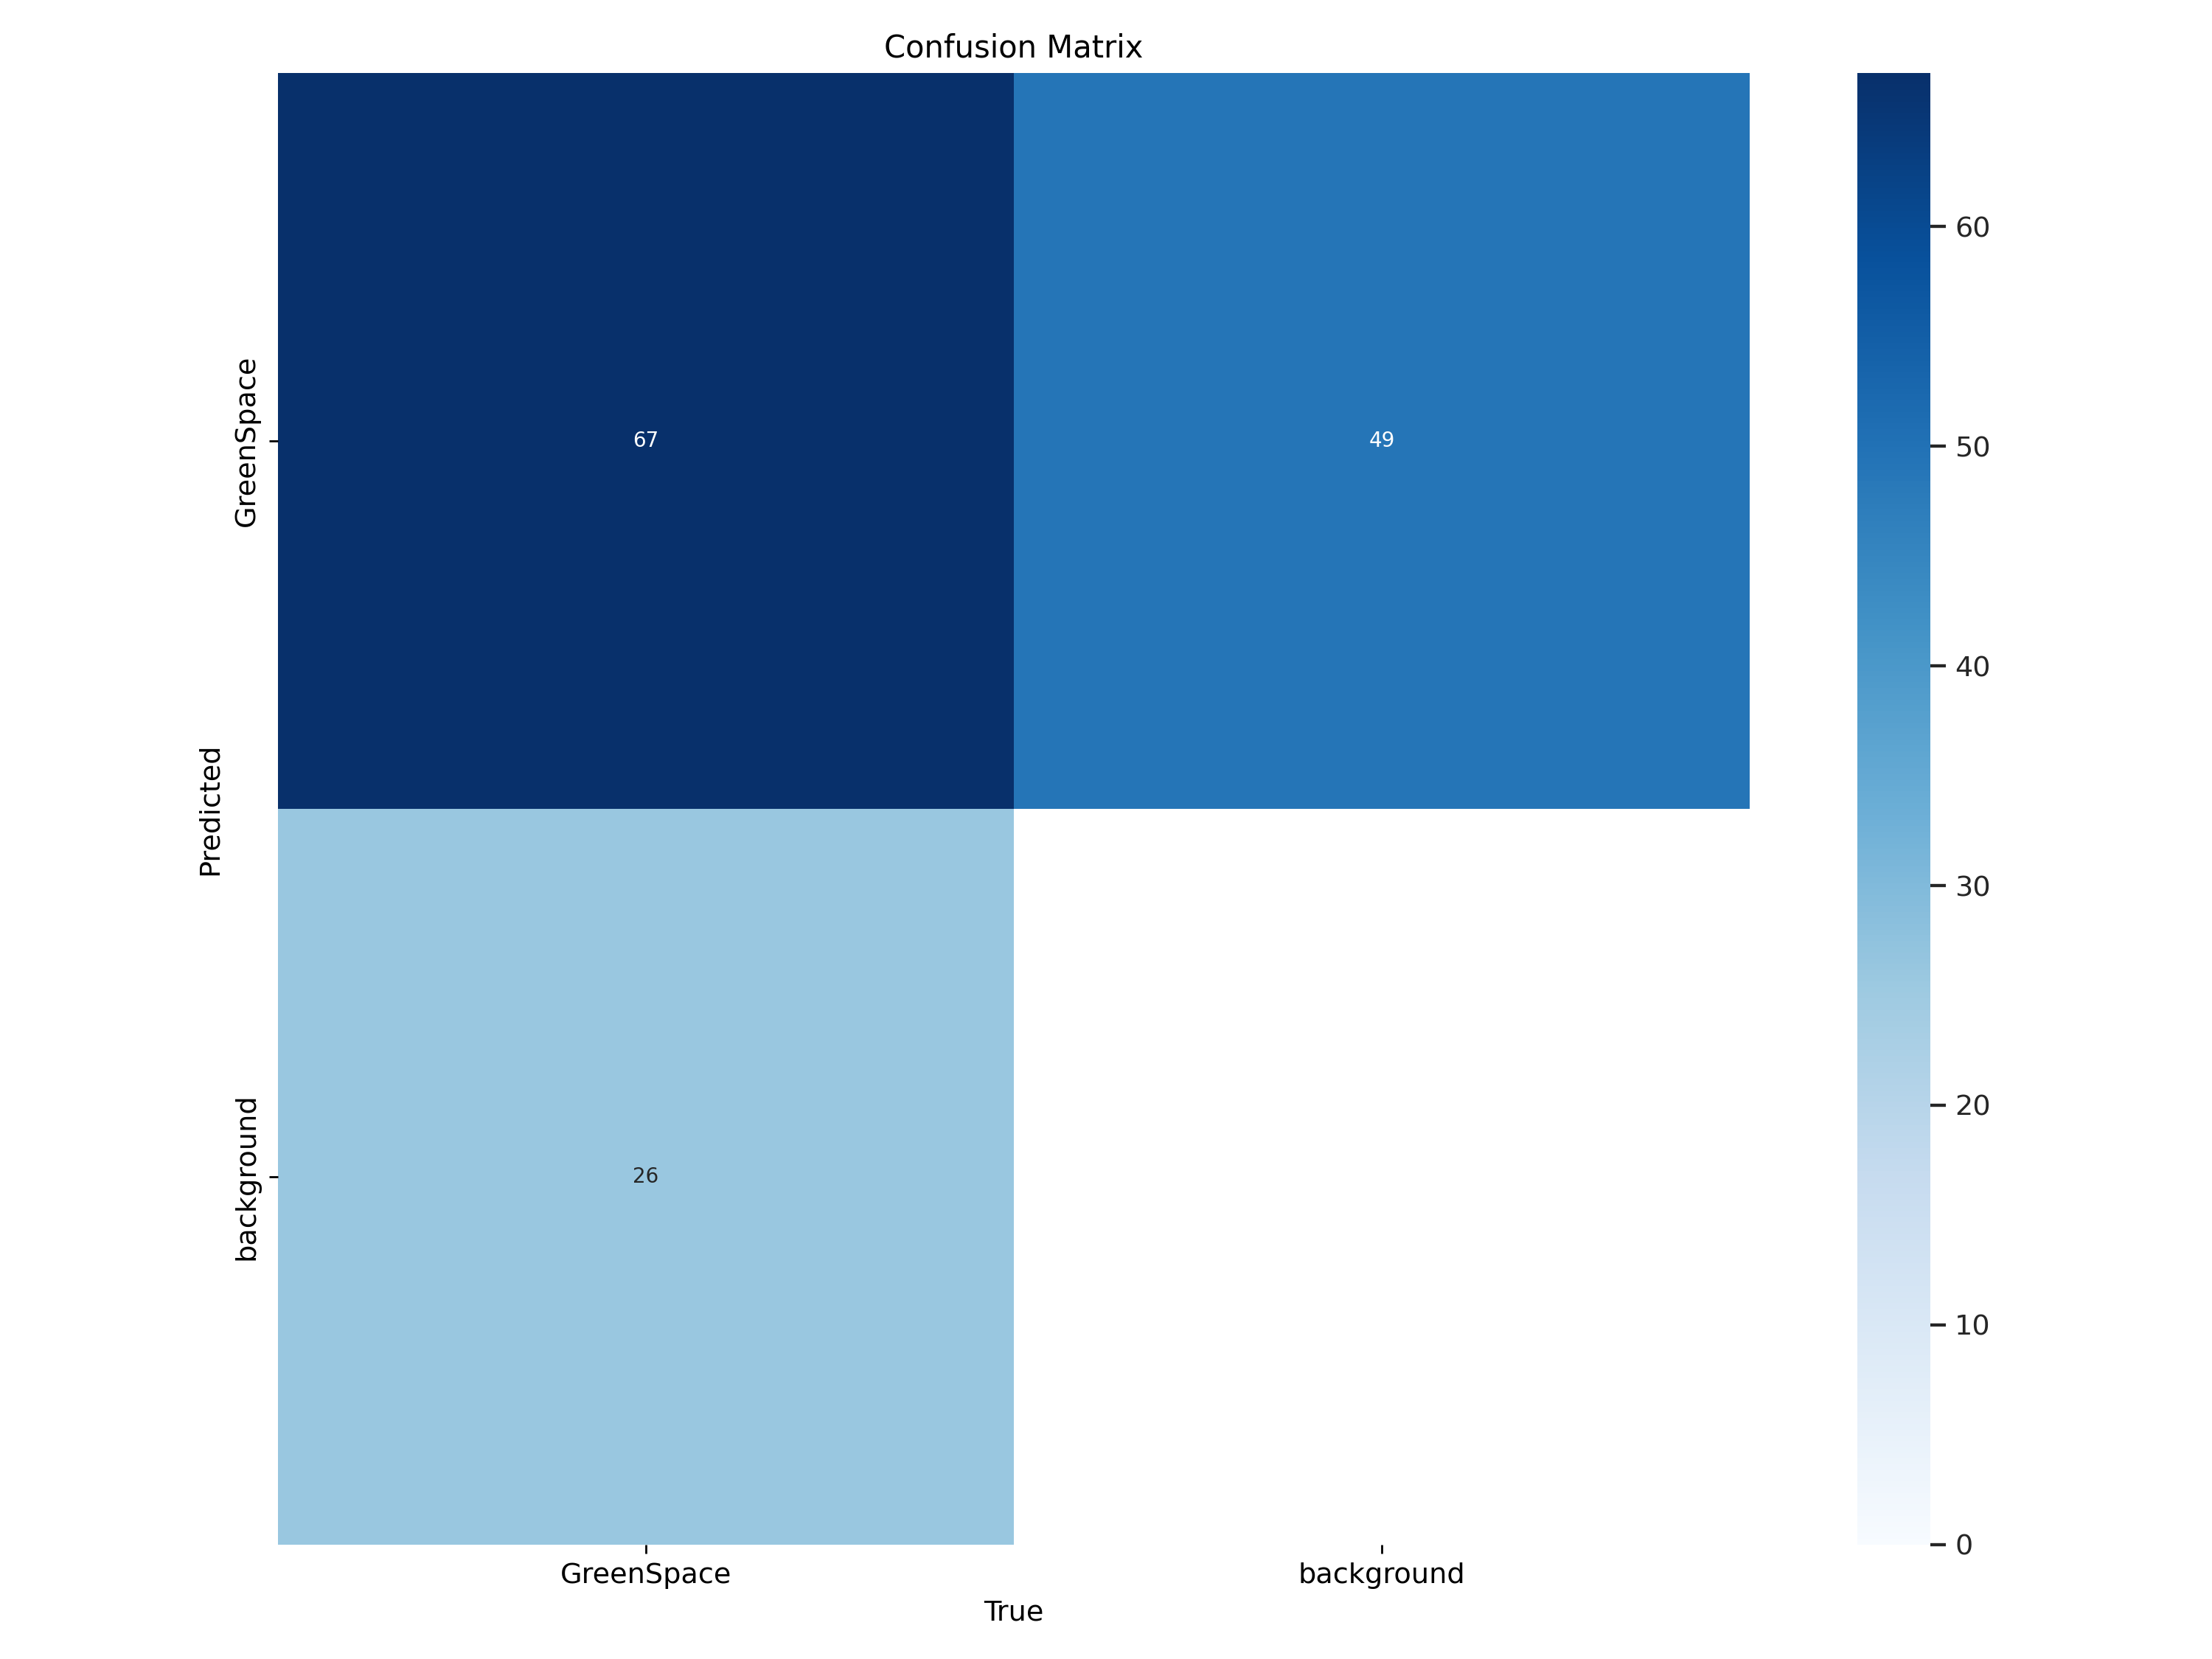

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


NameError: ignored

/content


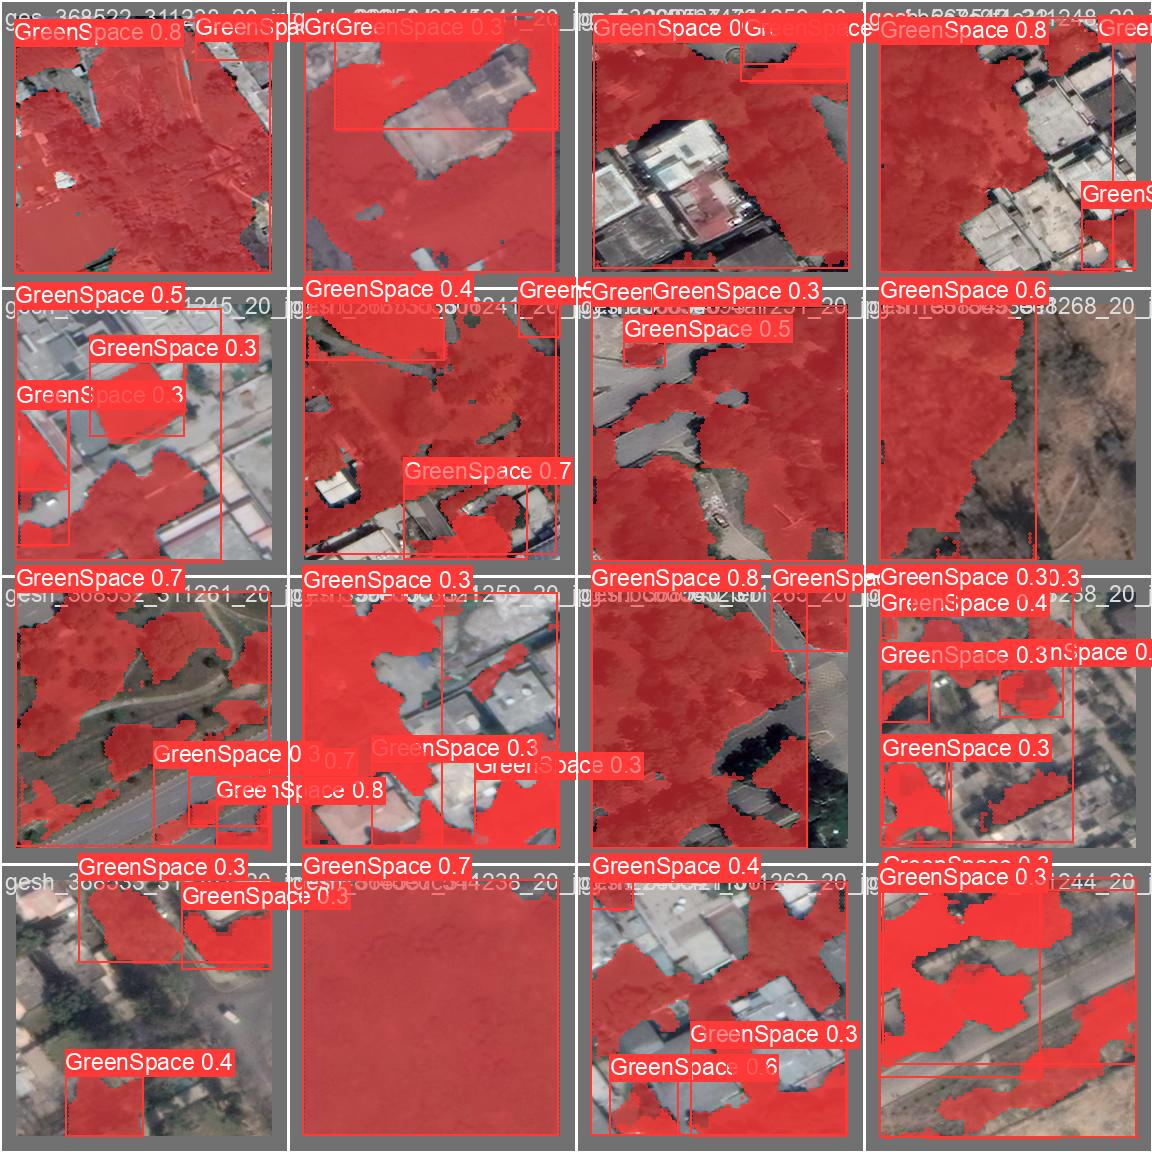

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Inference with Custom Model

In [ ]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.25 source='/content/gesh_368554_311248_20.jpg' save=true hide_labels = True boxes = False

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_boxes' instead.
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/gesh_368554_311248_20.jpg: 256x256 5 GreenSpaces, 28.5ms
Speed: 0.9ms preprocess, 28.5ms inference, 931.5ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


### Calculating the Evaluation metric

In [ ]:
# # import shutil
# # from google.colab.patches import cv2_imshow
# # outer_folder = 368521
# # inner_folder = 311238
# # saving_base_path = '/content/drive/MyDrive'
# # !mkdir -p "{saving_base_path}/2012_Predicted/{outer_folder}"
# # output_path = f"{saving_base_path}/2012_Predicted/{outer_folder}/gesh_{outer_folder}_{inner_folder}_20.jpg"
# # image = cv2.imread(f"/content/runs/segment/predict10/gesh_{outer_folder}_{inner_folder}_20.jpg")
# # cv2_imshow(image)
# # shutil.copy(f"/content/runs/segment/predict10/gesh_{outer_folder}_{inner_folder}_20.jpg", output_path)

# model_1_AUG = YOLO(r'/content/drive/MyDrive/models/Dataset_1.pt')
# model_1_NON_AUG = YOLO(r'/content/drive/MyDrive/models/Dataset1_NON_AUG.pt')
# model_2_AUG = YOLO(r'/content/drive/MyDrive/models/Dataset_2_AUG.pt')
model_2_NON_AUG = YOLO(r'/content/drive/MyDrive/models/Dataset_2.pt')
# results_1_AUG = model_1_AUG.predict(source=r'/content/gesh_368521_311245_20.jpg',save=True, save_txt=True, boxes=False)
# results_1_NON_AUG = model_1_NON_AUG.predict(source=r'/content/gesh_368521_311245_20.jpg',save=True, save_txt=True, boxes=False)
# results_2_AUG = model_2_AUG.predict(source=r'/content/gesh_368521_311245_20.jpg',save=True, save_txt=True, boxes=False)
results_2_NON_AUG = model_2_NON_AUG.predict(source=r'/content/ges_368522_311238_20_jpg.rf.ec309b4d35e58d46319481d71bf76d9b.jpg',save=True, save_txt=True, boxes=False)
# print("type(result):",type(results))
# print("len(result):",len(results))
# # print("result:",result)
# result = results[0]
# masks = result.masks
# print("Len(masks):",len(masks))



WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_boxes' instead.



FileNotFoundError: ignored

In [ ]:

from shapely.geometry import Polygon
from shapely.ops import unary_union

def read_annotation_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    polygons = []
    for line in lines:
        # Parse the line and extract polygon vertices
        vertices = [float(coord) for coord in line.strip().split()[1:]]
        polygons.append(Polygon([(vertices[i], vertices[i+1]) for i in range(0, len(vertices), 2)]))
    return polygons

def combine_polygons(polygons):
    # Combine multiple polygons into a single polygon
    return unary_union(polygons)

def calculate_iou(polygon1, polygon2):
    print("polygon1.area:", polygon1.area)
    print("polygon2.area:", polygon2.area)
    intersection = polygon1.intersection(polygon2).area
    union = polygon1.union(polygon2).area
    iou = intersection / union
    return iou
def calculate_iou_in_a_better_way(p1,p2):
  intersection = p1.intersection(p2).area
  denominator = 0
  if(p1.area >= p2.area):
    denominator = p2.area
  else:
    denominator = p1.area
  print("uper wala:", intersection)
  print("neechay wala:", denominator)
  iou = intersection/denominator
  return iou

# Read annotations from files
label_polygons = read_annotation_file(r'/content/Islo-data-Binary-21/test/labels/ges_368522_311238_20_jpg.rf.ec309b4d35e58d46319481d71bf76d9b.txt')
prediction_polygons = read_annotation_file(r'/content/runs/segment/predict/labels/ges_368522_311238_20_jpg.rf.ec309b4d35e58d46319481d71bf76d9b.txt')

# # Combine polygons if needed
# combined_label_polygon = combine_polygons(label_polygons)

iou_scores = []
# Calculate IoU for each pair
for i in label_polygons:
  for j in prediction_polygons:
    iou_scores.append(calculate_iou_in_a_better_way(i,j))
# iou_scores = [calculate_iou(combined_label_polygon, prediction_polygon) for prediction_polygon in prediction_polygons]

print(iou_scores)
print('Mean IoU:', sum(iou_scores)/len(iou_scores))
# Print IoU scores
# for i, iou in enumerate(iou_scores):
#     print(f'IoU between combined label and prediction polygon {i+1}: {iou}')


uper wala: 0.5449542178304664
neechay wala: 0.5854947506691742
uper wala: 0.0
neechay wala: 0.029281687499699997
[0.9307585033130131, 0.0]
Mean IoU: 0.46537925165650657


### Spatial Generalizibility
Testing the spatial generalizibilty of all four models on KARACHI's and SWAT's satellite imagery

In [ ]:
from google.colab.patches import cv2_imshow

def get_mask(predict, filename, tag):
    for result in predict:
      if result.masks == None:
        print(filename,"in",tag, "is MASLA")
        return np.zeros((256, 256), dtype=np.uint8)
        break
      masks = result.masks.cpu().numpy()
    index = (len(masks))
    hey = 0
    BIG_LIST = list()

    for i in range(index):
      if predict[0].masks == None:
        break
      a = (predict[0].masks.data[i].cpu().numpy() * 255).astype("uint8")
      hey+=a
    return hey

DATA_1_NON_AUG = fr"/content/drive/MyDrive/models/Dataset1_NON_AUG.pt"
DATA_1_AUG = fr"/content/drive/MyDrive/models/Dataset_1.pt"
DATA_2_NON_AUG = fr"/content/drive/MyDrive/models/Dataset_2.pt"
DATA_2_AUG = fr"/content/drive/MyDrive/models/Dataset_2_AUG.pt"

MODEL_1_NON_AUG = YOLO(DATA_1_NON_AUG)
MODEL_1_AUG = YOLO(DATA_1_AUG)
MODEL_2_NON_AUG = YOLO(DATA_2_NON_AUG)
MODEL_2_AUG = YOLO(DATA_2_AUG)

folder_path = fr'/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Images'
for filename in os.listdir(folder_path):
  print(filename)
  file_path = os.path.join(folder_path, filename)
  if os.path.exists(file_path):
    predict_1_NON_AUG = MODEL_1_NON_AUG.predict(source=file_path, save=True, save_txt=True, boxes=False)
    predict_1_AUG = MODEL_1_AUG.predict(source=file_path, save=True, save_txt=True, boxes=False)
    predict_2_NON_AUG = MODEL_2_NON_AUG.predict(source=file_path, save=True, save_txt=True, boxes=False)
    predict_2_AUG = MODEL_2_AUG.predict(source=file_path, save=True, save_txt=True, boxes=False)

    cv2.imwrite(fr"/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Predictions/DATA_1_NON_AUG/{filename[:-4]}.jpg",get_mask(predict_1_NON_AUG, filename, "DATA_1_NON_AUG"))
    cv2.imwrite(fr"/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Predictions/DATA_1_AUG/{filename[:-4]}.jpg",get_mask(predict_1_AUG, filename, "DATA_1_AUG"))
    cv2.imwrite(fr"/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Predictions/DATA_2_NON_AUG/{filename[:-4]}.jpg",get_mask(predict_2_NON_AUG, filename, "DATA_2_NON_AUG"))
    cv2.imwrite(fr"/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Predictions/DATA_2_AUG/{filename[:-4]}.jpg",get_mask(predict_2_AUG, filename, "DATA_2_AUG"))

ges_359868_298378_20.jpg
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_boxes' instead.

image 1/1 /content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Images/ges_359868_298378_20.jpg: 256x256 8 GreenSpaces, 1058.3ms
Speed: 3.4ms preprocess, 1058.3ms inference, 35.8ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_boxes' instead.

image 1/1 /content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Images/ges_359868_298378_20.jpg: 256x256 12 GreenSpaces, 906.4ms
Speed: 0.7ms preprocess, 906.4ms inference, 7.3ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/segment/predict2
1 label saved to runs/segment/predict2/labels
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 

KeyboardInterrupt: 

### IoU
Calculating IoU between ground truth masks and predicted masks for each dataset

In [ ]:
import os
import cv2
import numpy as np

def calculate_iou(ground_truth, prediction):

    if not (os.path.exists(prediction)):
      print("AAAAAAAAAAAAAAAAAAAAAAAAAAAaa")
    # Read binary masks
    mask_gt = cv2.imread(ground_truth, cv2.IMREAD_GRAYSCALE)
    mask_pred = cv2.imread(prediction, cv2.IMREAD_GRAYSCALE)

    # Threshold the masks to ensure binary values
    _, mask_gt = cv2.threshold(mask_gt, 128, 255, cv2.THRESH_BINARY)
    _, mask_pred = cv2.threshold(mask_pred, 128, 255, cv2.THRESH_BINARY)

    # Compute intersection and union
    intersection = np.logical_and(mask_gt, mask_pred)
    union = np.logical_or(mask_gt, mask_pred)

    # Calculate IoU
    if np.sum(union) == 0:
      return np.sum(intersection) / (np.sum(mask_gt))
    iou = np.sum(intersection) / (np.sum(union)+0.0000007)
    return iou

ground_truth_folder_path = fr'/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Masks/'
prediction_path_DATA_1_AUG = fr"/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Predictions/DATA_1_AUG/"
prediction_path_DATA_1_NON_AUG = fr"/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Predictions/DATA_1_NON_AUG/"
prediction_path_DATA_2_AUG = fr"/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Predictions/DATA_2_AUG/"
prediction_path_DATA_2_NON_AUG = fr"/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/Predictions/DATA_2_NON_AUG/"

iou_score_list_DATA_1_AUG = list()
iou_score_list_DATA_1_NON_AUG = list()
iou_score_list_DATA_2_AUG = list()
iou_score_list_DATA_2_NON_AUG = list()

for i in os.listdir(ground_truth_folder_path):
  iou_score_DATA_1_AUG = calculate_iou(ground_truth_folder_path+i, prediction_path_DATA_1_AUG+i)
  iou_score_DATA_1_NON_AUG = calculate_iou(ground_truth_folder_path+i, prediction_path_DATA_1_NON_AUG+i)
  iou_score_DATA_2_AUG = calculate_iou(ground_truth_folder_path+i, prediction_path_DATA_2_AUG+i)
  iou_score_DATA_2_NON_AUG = calculate_iou(ground_truth_folder_path+i, prediction_path_DATA_2_NON_AUG+i)
  # if(iou_score==0):
  #   continue

  iou_score_list_DATA_1_AUG.append(iou_score_DATA_1_AUG)
  iou_score_list_DATA_1_NON_AUG.append(iou_score_DATA_1_NON_AUG)
  iou_score_list_DATA_2_AUG.append(iou_score_DATA_2_AUG)
  iou_score_list_DATA_2_NON_AUG.append(iou_score_DATA_2_NON_AUG)


  with open('/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/IoU_Scores/IoU_DATA_1_AUG.txt', 'a') as file:
    file.write(f"{i}--> IOU SCORE: {iou_score_DATA_1_AUG}\n")

  with open('/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/IoU_Scores/IoU_DATA_1_NON_AUG.txt', 'a') as file:
    file.write(f"{i}--> IOU SCORE: {iou_score_DATA_1_NON_AUG}\n")

  with open('/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/IoU_Scores/IoU_DATA_2_AUG.txt', 'a') as file:
    file.write(f"{i}--> IOU SCORE: {iou_score_DATA_2_AUG}\n")

  with open('/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/IoU_Scores/IoU_DATA_2_NON_AUG.txt', 'a') as file:
    file.write(f"{i}--> IOU SCORE: {iou_score_DATA_2_NON_AUG}\n")


with open('/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/IoU_Scores/IoU_DATA_1_AUG.txt', 'a') as file:
  file.write(f"Arithmatic mean IoU score for DATA_1_AUG: {sum(iou_score_list_DATA_1_AUG)/len(iou_score_list_DATA_1_AUG)}")

with open('/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/IoU_Scores/IoU_DATA_1_NON_AUG.txt', 'a') as file:
  file.write(f"Arithmatic mean IoU score for DATA_1_NON_AUG: {sum(iou_score_list_DATA_1_NON_AUG)/len(iou_score_list_DATA_1_NON_AUG)}")

with open('/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/IoU_Scores/IoU_DATA_2_AUG.txt', 'a') as file:
  file.write(f"Arithmatic mean IoU score for DATA_2_AUG: {sum(iou_score_list_DATA_2_AUG)/len(iou_score_list_DATA_2_AUG)}")

with open('/content/drive/MyDrive/Spatial_Generalizibility/Karachi_4/IoU_Scores/IoU_DATA_2_NON_AUG.txt', 'a') as file:
  file.write(f"Arithmatic mean IoU score for DATA_2_NON_AUG: {sum(iou_score_list_DATA_2_NON_AUG)/len(iou_score_list_DATA_2_NON_AUG)}")

# print("Arithmatic mean IoU score for DATA_2_AUG:",sum(iou_score_list)/len(iou_score_list))
# print("Harmonic mean IoU score for DATA_1_AUG:", len(iou_score_list) / sum(1 / x for x in iou_score_list))

# DICE LOSS

In [ ]:
import os
import cv2
import numpy as np

def calculate_dice_loss(ground_truth, prediction):
    # Read binary masks
    mask_gt = cv2.imread(ground_truth, cv2.IMREAD_GRAYSCALE)
    mask_pred = cv2.imread(prediction, cv2.IMREAD_GRAYSCALE)

    # Threshold the masks to ensure binary values
    _, mask_gt = cv2.threshold(mask_gt, 128, 255, cv2.THRESH_BINARY)
    _, mask_pred = cv2.threshold(mask_pred, 128, 255, cv2.THRESH_BINARY)

    # Normalizing
    mask_gt = 1/255*mask_gt
    mask_pred = 1/255*mask_pred

    # Compute intersection and union
    intersection = np.logical_and(mask_gt, mask_pred)
    sum_add = np.sum(mask_gt) + np.sum(mask_pred)

    # Calculate IoU
    dice = 2 * np.sum(intersection) / sum_add
    return 1-dice

# Testing 123
# calculate_dice_loss('/content/drive/MyDrive/predicted_combined_test_equal/d1aug/ges_368522_311246_20_jpg.rf.0eaaf3a25fb7d49854a32dc9e53d192e.JPG','/content/drive/MyDrive/equal_masks/ges_368522_311246_20_jpg.rf.0eaaf3a25fb7d49854a32dc9e53d192e.JPG')

def get_image_names(folder_path):
    image_names = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    return image_names

ground_truth_folder_path = fr'/content/drive/MyDrive/Spatial_Generalizibility/Karachi/Masks/'
prediction_path = "/content/drive/MyDrive/Spatial_Generalizibility/Karachi/Predictions/DATA_1_AUG/"

ground_truth_image_names = get_image_names(ground_truth_folder_path)
dice_loss_list = list()

for i in ground_truth_image_names:
  dice_loss = calculate_dice_loss(ground_truth_folder_path+i, prediction_path+i)
  dice_loss_list.append(dice_loss)
  print(fr"{i}--> Dice Loss: {dice_loss}")

print("mean DICE Loss for DATA_1_AUG:",sum(dice_loss_list)/len(dice_loss_list))

ges_359889_298384_20.JPG--> Dice Loss: 0.4448303499866417
ges_359879_298392_20.JPG--> Dice Loss: 0.24606405693950173
ges_359882_298391_20.JPG--> Dice Loss: 1.0
ges_359891_298384_20.JPG--> Dice Loss: 0.37784906927295114
ges_359887_298392_20.JPG--> Dice Loss: 0.5636747272272967
ges_359883_298387_20.JPG--> Dice Loss: 0.178275500235192
ges_359891_298385_20.JPG--> Dice Loss: 0.2652745552977571
ges_359880_298391_20.JPG--> Dice Loss: 0.6579859392019012
ges_359885_298388_20.JPG--> Dice Loss: 0.22591127990290116
ges_359879_298391_20.JPG--> Dice Loss: 1.0
ges_359891_298387_20.JPG--> Dice Loss: 0.2294665537679932
ges_359890_298391_20.JPG--> Dice Loss: 0.15029020143393645
ges_359886_298389_20.JPG--> Dice Loss: 0.3366302954182694
ges_359888_298387_20.JPG--> Dice Loss: 0.33907170760776006
ges_359884_298388_20.JPG--> Dice Loss: 0.10318707019932283
ges_359878_298385_20.JPG--> Dice Loss: 0.09483935709937985
ges_359890_298392_20.JPG--> Dice Loss: 0.16800612323000386
ges_359881_298386_20.JPG--> Dice Loss

### Calculations for inference
In this section, we're carrying out the following tasks:
- Segmenting the greenspaces in each tile of F-7 from the year 2013 to 2023.
- Calculating the area of the entire greenspace.

In [ ]:
# %cd {HOME}
import torch
import shutil
import cv2
from google.colab.patches import cv2_imshow
bupix = 0
tcpix = 0
glpix = 0

Likh_jldi = 1
%cd {HOME}
import torch
import cv2
from google.colab.patches import cv2_imshow
class_labels = ['GreenSpace']
model = YOLO('/content/drive/MyDrive/models/best_v11_NO_AUG.pt')
saving_base_path = '/content/drive/MyDrive'
!mkdir -p fr"{saving_base_path}/2018_predicted_NO_AUGMENTATION"
print(fr"{saving_base_path}/2018_predicted_NO_AUGMENTATION created successfully")
for outer_folder in range(368521,368561):
# for outer_folder in range(368560,368561):
  !mkdir {saving_base_path}/2018_predicted_NO_AUGMENTATION/{outer_folder}
  print(fr"{saving_base_path}/2018_predicted_NO_AUGMENTATION/{outer_folder} created successfully")
  for inner_folder in range(311238, 311269):
  # for inner_folder in range(311260, 311269):
    img = fr'/content/drive/MyDrive/2018/20/{outer_folder}/gesh_{outer_folder}_{inner_folder}_20.jpg'
    predict = model.predict(source=img, save=True, save_txt=True, boxes=False)
    H , W , _ = cv2.imread(img).shape
    for result in predict:
      if result.masks == None:
        break
      masks = result.masks.cpu().numpy()
      boxes = result.boxes.cpu().numpy()
    index = (len(masks))
    print("YELO BHIA:",index)
    for i in range(index):
      if predict[0].masks == None:
        break
      a = (predict[0].masks.data[i].cpu().numpy() * 255).astype("uint8")
      # cv2_imshow(a)
      # print((model.names[boxes[i].cls[0]]))
      # print("............................................................")
      white_pixel_count = cv2.countNonZero(a)
      if (model.names[boxes[i].cls[0]]) == "GreenSpace":
        bupix += white_pixel_count
      if (model.names[boxes[i].cls[0]]) == "Treecover":
        tcpix += white_pixel_count
      if (model.names[boxes[i].cls[0]]) == "GrassLand":
        glpix += white_pixel_count
    predict_no = 4
    output_path = f"{saving_base_path}/2018_predicted_NO_AUGMENTATION/{outer_folder}/gesh_{outer_folder}_{inner_folder}_20.jpg"
    image = cv2.imread(f"/content/runs/segment/predict{predict_no}/gesh_{outer_folder}_{inner_folder}_20.jpg")
    shutil.copy(f"/content/runs/segment/predict{predict_no}/gesh_{outer_folder}_{inner_folder}_20.jpg", output_path)
    print(f"gesh_{outer_folder}_{inner_folder}_20.jpg copied successfully")


    with open('/content/drive/MyDrive/2018_predicted_NO_AUGMENTATION/me.txt', 'w') as file:
      file.write(f"Analyzing the image '{outer_folder}/{inner_folder}'...\n")
      file.write(f"| GreenSpace area in 2018 |\t {bupix} * 0.000000022201 = {bupix*0.000000022201} sq. km\n")
      file.write(f"END")
      # file.write(f"| BuiltUp area in 2023 |\t {abs(bupix - Likh_jldi*256*256)} * 0.000000022201 = {abs(bupix - Likh_jldi*256*256)*0.000000022201} sq. km\n")

      # file.write(f"| tree cover area in 2022|\t {tcpix} * 0.000149 = {tcpix*0.000149} sq. km\n")
      # file.write(f"| grass land area in 2022|\t {glpix} * 0.000149 = {glpix*0.000149} sq. km\n")
      # print(f"| GreenSpace area in 2023 |\t {bupix} * 0.000000022201 = {bupix*0.000000022201} sq. km\n")
      # print(f"| BuiltUp area in 2023 |\t {abs(bupix - Likh_jldi*256*256)} * 0.000000022201 = {abs(bupix - 256*256)*0.000000022201} sq. km\n")
      # print("| GreenSpace area in 2022 |\t", bupix, '*', 0.000000022201, '=', bupix*0.000000022201)
      # print(f"| GreenSpace area in 2022 |\t {bupix} * 0.000000022201 = {bupix*0.000000022201} sq. km\n")
      # print("| grass land area in 2023|\t", glpix, '*', 0.000149, '=', glpix*0.000149)
      Likh_jldi = bupix + Likh_jldi
    print(f"| GreenSpace area in 2018 |\t {bupix} * 0.000000022201 = {bupix*0.000000022201} sq. km\n")
    print("BHAI BAS")
with open('/content/drive/MyDrive/2018_predicted_NO_AUGMENTATION/me.txt', 'w') as file:
  file.write(f"DATA SUMMARIZATION FOR 2018:\n")
  file.write(f"| GreenSpace area in 2018 |\t {bupix} * 0.000000022201 = {bupix*0.000000022201} sq. km\n")
  file.write(f"| BuiltUp area in 2018 |\t {abs(bupix - 10240*7936)} * 0.000000022201 = {abs(bupix - 10240*7936)*0.000000022201} sq. km\n")
  file.write(f"NOW I ENDED THINGS.....")
print(f"| GreenSpace area in 2018 |\t {bupix} * 0.000000022201 = {bupix*0.000000022201} sq. km\n")
print(f"| BuiltUp area in 2018 |\t {abs(bupix - 10240*7936)} * 0.000000022201 = {abs(bupix - 10240*7936)*0.000000022201} sq. km\n")
print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
# print(bupix)
# print("| GreenSpace area in 2022 |\t", bupix, '*', 0.000000022201, '=', bupix*0.000000022201)
# print(tcpix)
# print("| tree cover area in 2022|\t", tcpix, '*', 0.000149, '=', tcpix*0.000149)
# print(glpix)
# print("| grass land area in 2022|\t", glpix, '*', 0.000149, '=', glpix*0.000149)


Streaming output truncated to the last 5000 lines.
Results saved to runs/segment/predict4
787 labels saved to runs/segment/predict4/labels
YELO BHIA: 4
gesh_368546_311250_20.jpg copied successfully
| GreenSpace area in 2018 |	 32462301 * 0.000000022201 = 0.720695544501 sq. km

BHAI BAS
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_boxes' instead.

image 1/1 /content/drive/MyDrive/2018/20/368546/gesh_368546_311251_20.jpg: 256x256 8 GreenSpaces, 849.3ms
Speed: 0.7ms preprocess, 849.3ms inference, 8.8ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/segment/predict4
788 labels saved to runs/segment/predict4/labels
YELO BHIA: 8
gesh_368546_311251_20.jpg copied successfully
| GreenSpace area in 2018 |	 32504748 * 0.000000022201 = 0.7216379103480001 sq. km

BHAI BAS
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_boxes' instead.

image 1/1 /content/driv

Mask 1


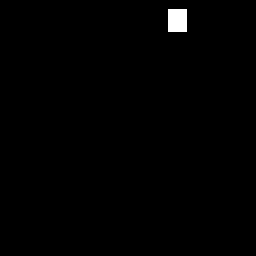

In [ ]:
import cv2
import numpy as np

def generate_binary_masks_from_txt(txt_file, image_size):
    # Read the .txt file
    with open(txt_file, 'r') as file:
        lines = file.readlines()

    # Create an empty list to store individual masks
    masks = []

    for line in lines:
        values = line.split()
        x_min, y_min, x_max, y_max = map(float, values[1:5])

        # Convert normalized coordinates to pixel coordinates
        x_min_pixel = int(x_min * image_size[1])
        y_min_pixel = int(y_min * image_size[0])
        x_max_pixel = int(x_max * image_size[1])
        y_max_pixel = int(y_max * image_size[0])

        # Create a binary mask for each bounding box
        mask = np.zeros(image_size, dtype=np.uint8)
        mask[y_min_pixel:y_max_pixel, x_min_pixel:x_max_pixel] = 255
        masks.append(mask)

    return masks

# Example usage
txt_file_path = r'/content/Islo-data-Binary-12/train/labels/ges_368522_311238_20_jpg.rf.ec309b4d35e58d46319481d71bf76d9b.txt'
image_size = (256, 256)  # Replace with the actual size of your image
resulting_masks = generate_binary_masks_from_txt(txt_file_path, image_size)

# Display each resulting mask
for i, mask in enumerate(resulting_masks):
    print(f'Mask {i+1}')
    cv2_imshow(mask)

cv2.waitKey(0)
cv2.destroyAllWindows()


WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_boxes' instead.

image 1/1 /content/ges_368522_311238_20_jpg.rf.ec309b4d35e58d46319481d71bf76d9b.jpg: 256x256 2 GreenSpaces, 28.0ms
Speed: 0.7ms preprocess, 28.0ms inference, 2.8ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/segment/predict14
1 label saved to runs/segment/predict14/labels
YELO BHIA: 2


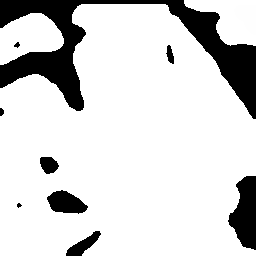

[array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)]




In [ ]:
import cv2
from google.colab.patches import cv2_imshow

/content/Islo-data-Binary-10/test/images

img = fr'/content/ges_368522_311238_20_jpg.rf.ec309b4d35e58d46319481d71bf76d9b.jpg'
model_2_NON_AUG = YOLO(fr'/content/drive/MyDrive/models/Dataset_2.pt')
predict = model_2_NON_AUG.predict(source=img, save=True, save_txt=True, boxes=False)
H , W , _ = cv2.imread(img).shape
for result in predict:
  if result.masks == None:
    break
  masks = result.masks.cpu().numpy()
  boxes = result.boxes.cpu().numpy()
index = (len(masks))
print("YELO BHIA:",index)
hey = 0
BIG_LIST = list()

for i in range(index):
  if predict[0].masks == None:
    break
  a = (predict[0].masks.data[i].cpu().numpy() * 255).astype("uint8")
  hey+=a
cv2_imshow(hey)
cv2_imwrite('/content/drive/MyDrive/predicted_masks/Data1noaug)
BIG_LIST.append(hey)
print(BIG_LIST)
print('\n')

## BINARY MASKS

WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_boxes' instead.

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/hehe.JPG: 256x256 1 GreenSpace, 34.6ms
Speed: 13.3ms preprocess, 34.6ms inference, 766.4ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels
YELO BHIA: 1


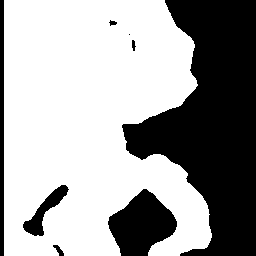

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

# Assuming YOLO class and required imports are defined elsewhere

def process_image(image_path, output_folder):
    model_2_NON_AUG = YOLO(fr'/content/drive/MyDrive/models/Dataset_1.pt')
    predict = model_2_NON_AUG.predict(source=image_path, save=True, save_txt=True, boxes=False)

    H, W, _ = cv2.imread(image_path).shape
    for result in predict:
        if result.masks is None:
          print(image_path,"no predicts")
          break
        masks = result.masks.cpu().numpy()
        boxes = result.boxes.cpu().numpy()

    index = len(masks)
    print("YELO BHIA:", index)

    hey = 0
    for i in range(index):
        if predict[0].masks is None:

            break
        a = (predict[0].masks.data[i].cpu().numpy() * 255).astype("uint8")
        hey += a

    # Display the result
    cv2_imshow(hey)

    # Save the result with the same name in the output folder
    output_path = os.path.join(output_folder, os.path.basename(image_path))
    cv2.imwrite(output_path, hey)

# Set input and output folders
input_folder = '/content/.JPG'
output_folder = '/content/drive/MyDrive/predicted_combined_test_equal/d1aug'

# Iterate through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.jpeg', '.JPG')):
    # if filename.endswith(('.png')):     #d2aug and d1aug could not identify that
        image_path = os.path.join(input_folder, filename)
        process_image(image_path, output_folder)

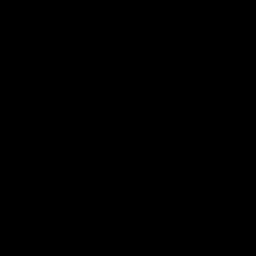

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
array_2d = np.zeros((256, 256), dtype=int)
cv2_imshow(array_2d)
cv2.imwrite("/content/drive/MyDrive/predicted_combined_test_equal/d2aug/ges_368557_311248_20_jpg.rf.01b0085e9b29f00696fd626b6e2eb62b.JPG", array_2d)

/content/drive/MyDrive/2012/20/368521/gesh_368521_311238_20.jpg
/content/drive/MyDrive/2012/20/368521/ges_368521_311238_20.jpg